
# Decision Tree Assignment

Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

Loading Data and modules

import numpy as np

import pandas as pd

import seaborn as sb

import matplotlib.pyplot as plt

import sklearn

from pandas import Series, DataFrame

from pylab import rcParams

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression

from sklearn.cross_validation import train_test_split

from sklearn import metrics

from sklearn.metrics import classification_report

Url = https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv

titanic = pd.read_csv(url)

titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [1]:
## Import analysis modules
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

## Import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## The Data

Let's start by reading in the titanic-train.csv file into a pandas dataframe.

In [2]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch(Parents/children aboard), and Fare to predict whether a passenger survived.

In [3]:
df = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [5]:
print('Age feature has', df['Age'].isnull().sum(), 'missing values')

Age feature has 177 missing values


In [6]:
print('Age feature has', df['Age'].isnull().mean()*100, 'percent missing values')

Age feature has 19.865319865319865 percent missing values


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation.

## Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

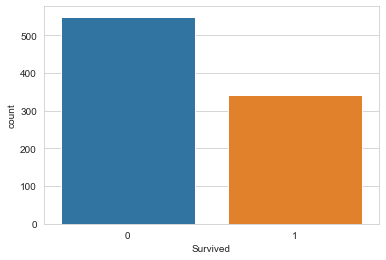

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)

In [8]:
df.groupby('Survived').count()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,549,549,424,549,549,549
1,342,342,290,342,342,342


In [9]:
## total survival rate of dataset
print('%0.4f percent of the Titanic passengers survived' % (df['Survived'].mean()*100))

38.3838 percent of the Titanic passengers survived


<AxesSubplot:xlabel='Survived', ylabel='count'>

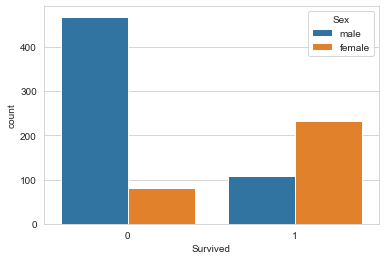

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df)

In [11]:
df.groupby(['Survived', 'Sex']).count()

Pclass  Age  SibSp  Parch  Fare
Survived Sex                                    
0        female      81   64     81     81    81
         male       468  360    468    468   468
1        female     233  197    233    233   233
         male       109   93    109    109   109

<AxesSubplot:xlabel='Survived', ylabel='count'>

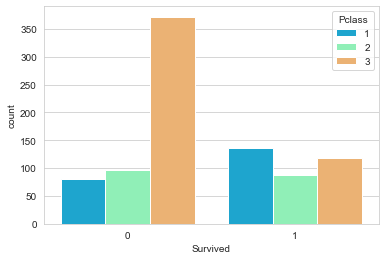

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=df, palette='rainbow')

In [13]:
df.groupby(['Survived', 'Pclass']).count()

Sex  Age  SibSp  Parch  Fare
Survived Pclass                              
0        1        80   64     80     80    80
         2        97   90     97     97    97
         3       372  270    372    372   372
1        1       136  122    136    136   136
         2        87   83     87     87    87
         3       119   85    119    119   119

<AxesSubplot:>

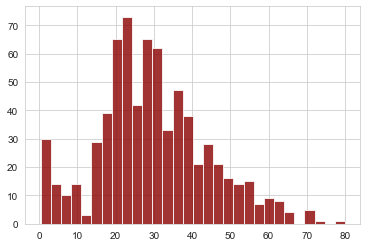

In [14]:
df['Age'].hist(bins=30, color='darkred', alpha=0.8)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

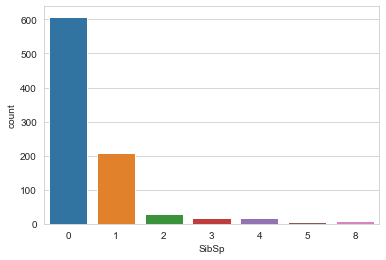

In [15]:
sns.countplot(x='SibSp', data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

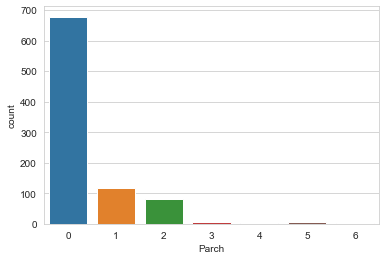

In [16]:
sns.countplot(x='Parch', data=df)

<AxesSubplot:>

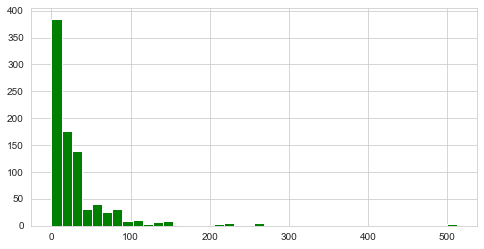

In [17]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Missing Value Imputation
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

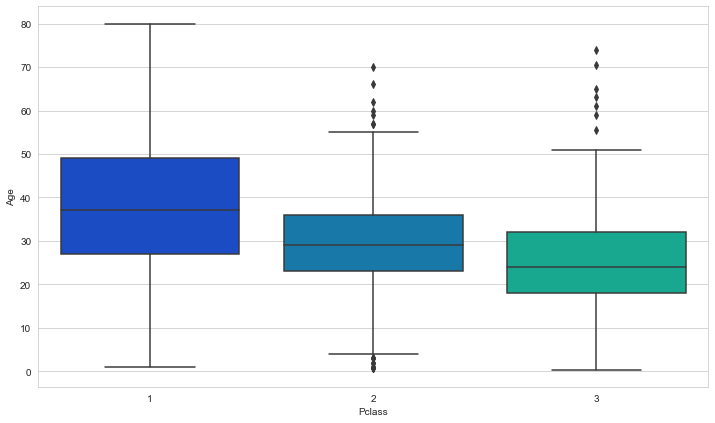

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')

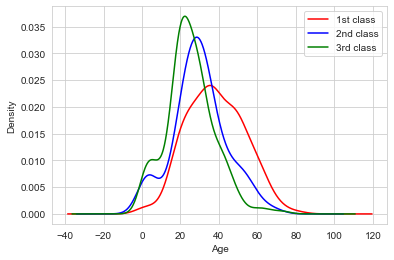

In [19]:
## Distribution of Age, condition = Pclass
df[df.Pclass==1].Age.plot(kind='kde', color='r', label='1st class')
df[df.Pclass==2].Age.plot(kind='kde', color='b', label='2nd class')
df[df.Pclass==3].Age.plot(kind='kde', color='g', label='3rd class')
plt.xlabel('Age')
plt.legend(loc='best')

In [20]:
df.groupby('Pclass').median()['Age']

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

According to the distribution for "Age" feature, the median age for passengers deviates depending on three different passenger classes. We can see the wealthier passengers in the higher classes tend to be older, which makes sense. Thus, we may replace missing values of age in each passenger class with the median age value for that passenger class.

In [21]:
for i in range(1,4):
    median_age = df[df['Pclass']==i]['Age'].median()
    df.loc[df['Pclass']==i, 'Age']=df.loc[df['Pclass']==i, 'Age'].fillna(median_age)

In [22]:
print('Age feature has', df['Age'].isnull().sum(), 'missing values')

Age feature has 0 missing values


## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [24]:
df['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [25]:
pd.get_dummies(df['Sex'], drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [26]:
df['Sex'] = pd.get_dummies(df['Sex'],drop_first=True)

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


Great! Our data is ready for our model!

# Building a Decision Tree model

## Model - 1
Let's start by splitting our data into a training set and test set.

## Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.20, 
                                                    random_state=101)

## Training and Predicting

In [29]:
clf = DecisionTreeClassifier(random_state=101)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [30]:
## Accuracy
print('Training data accuracy score:', clf.score(X_train, y_train))

Training data accuracy score: 0.9859550561797753


In [31]:
## Run 5 fold cross validation
cvs = cross_val_score(clf, df.drop('Survived', axis=1), df['Survived'], cv=5)
print(cvs)

[0.74301676 0.78089888 0.80898876 0.74719101 0.79213483]


In [32]:
## Show cross validation score mean
print("Accuracy: %0.4f" % (cvs.mean()))

Accuracy: 0.7744


Cross-validation accuracy lower than training data accuracy

In [33]:
## Predict y given test set
y_test_predicted = clf.predict(X_test)

In [34]:
#Accuracy
print('Test data accuracy score:', clf.score(X_test, y_test))

Test data accuracy score: 0.776536312849162


Test data accuracy is similar to cross-validation accuracy

## Classification report
We can check precision, recall, f1-score using classification report

In [35]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.76      0.74      0.75        80

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



## ROC Curve

In [36]:
## Get data to plot ROC Curve
fp, tp, th = roc_curve(y_test, y_test_predicted)
roc_auc = auc(fp, tp)
fp, tp, th, roc_auc

(array([0.        , 0.19191919, 1.        ]),
 array([0.    , 0.7375, 1.    ]),
 array([2, 1, 0], dtype=int64),
 0.772790404040404)

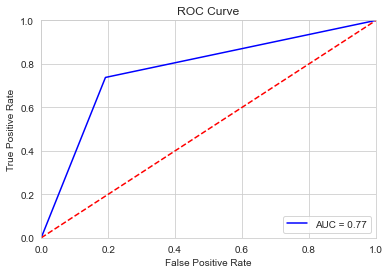

In [37]:
## Plot ROC Curve
plt.title('ROC Curve')
plt.plot(fp, tp, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Model - 2
### Discretization via binning

We will convert two continuous features (Age and Fare) into discrete counterparts.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

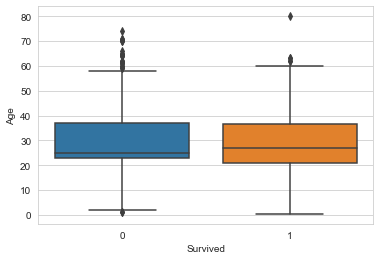

In [38]:
## Boxplot for Age
sns.boxplot(x='Survived', y='Age', data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

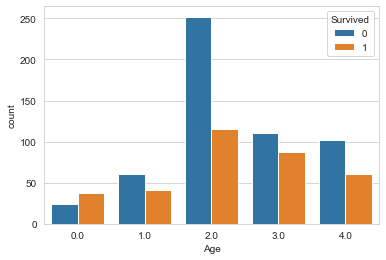

In [39]:
## discretize Age feature
df.loc[df['Age'] <= 9, 'Age'] = 0
df.loc[(df['Age'] > 9) & (df['Age'] <= 19), 'Age'] = 1
df.loc[(df['Age'] > 19) & (df['Age'] <= 29), 'Age'] = 2
df.loc[(df['Age'] > 29) & (df['Age'] <= 39), 'Age'] = 3
df.loc[df['Age'] > 39, 'Age'] = 4
sns.countplot(x='Age', data=df, hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

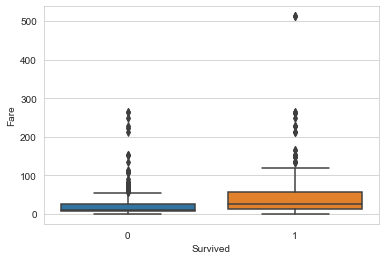

In [40]:
## Boxplot for Fare
sns.boxplot(x='Survived', y='Fare', data=df)

In [41]:
## discretize Fare
pd.qcut(df['Fare'], 8).value_counts()

(-0.001, 7.75]       140
(9.841, 14.454]      113
(24.479, 31.0]       112
(69.488, 512.329]    112
(7.91, 9.841]        111
(14.454, 24.479]     110
(31.0, 69.488]       110
(7.75, 7.91]          83
Name: Fare, dtype: int64

<AxesSubplot:xlabel='Fare', ylabel='count'>

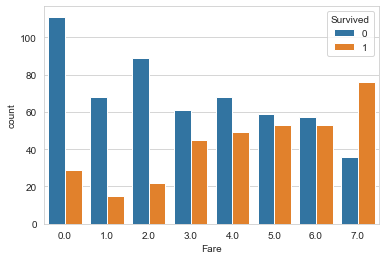

In [42]:
df.loc[df['Fare'] <= 7.75, 'Fare'] = 0
df.loc[(df['Fare'] > 7.75) & (df['Fare'] <= 7.91), 'Fare'] = 1
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 9.841), 'Fare'] = 2
df.loc[(df['Fare'] > 9.841) & (df['Fare'] <= 14.454), 'Fare'] = 3
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 24.479), 'Fare'] = 4
df.loc[(df['Fare'] > 24.479) & (df['Fare'] <= 31.0), 'Fare'] = 5
df.loc[(df['Fare'] > 31.0) & (df['Fare'] <= 69.488), 'Fare'] = 6
df.loc[df['Fare'] > 69.488, 'Fare'] = 7

sns.countplot(x='Fare', data=df, hue='Survived')

### Convert Discrete Features into Binary
SibSp (Siblings aboard) and Parch (Parents/children aboard) features are converted to binary.

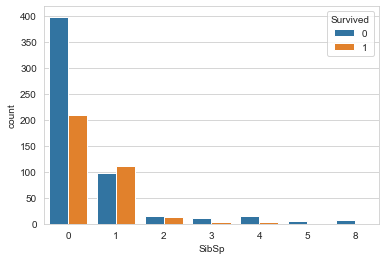

In [43]:
## Countplot for the number of siblings/spouse
sns.countplot(x='SibSp', data=df, hue='Survived')
plt.legend(loc='upper right', title='Survived')

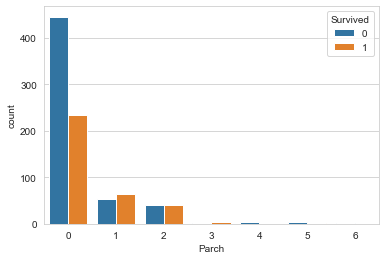

In [44]:
## Countplot for the number of parents/childrens
sns.countplot(x='Parch', data=df, hue='Survived')
plt.legend(loc='upper right', title='Survived')

Since the majority of cases are zero for both SibSp (Siblings aboard) and Parch (Parents/children aboard) discrete features, they are converted into binary format.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

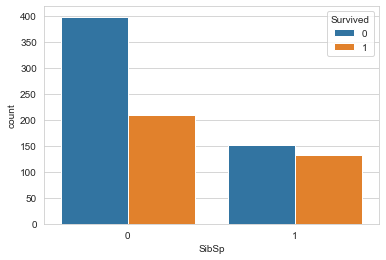

In [45]:
## Convert SibSp into binary feature
df.loc[df['SibSp']==0, 'SibSp']=0
df.loc[df['SibSp']!=0, 'SibSp']=1

sns.countplot(x='SibSp', data=df, hue='Survived')

<AxesSubplot:xlabel='Parch', ylabel='count'>

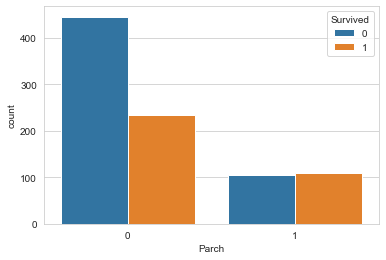

In [46]:
## Convert Parch into binary feature
df.loc[df['Parch']==0, 'Parch']=0
df.loc[df['Parch']!=0, 'Parch']=1
    
sns.countplot(x='Parch', data=df, hue='Survived')

In [47]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,2.0,1,0,0.0
1,1,1,0,3.0,1,0,7.0
2,1,3,0,2.0,0,0,2.0
3,1,1,0,3.0,1,0,6.0
4,0,3,1,3.0,0,0,2.0


In [48]:
## Survival rate under each feature
def survival_rate(feature):
    rate = df[[feature, 'Survived']].groupby([feature], as_index=False).mean().sort_values(by=[feature], ascending=True)
    sns.catplot(x=feature, y='Survived', data=rate, kind='point')

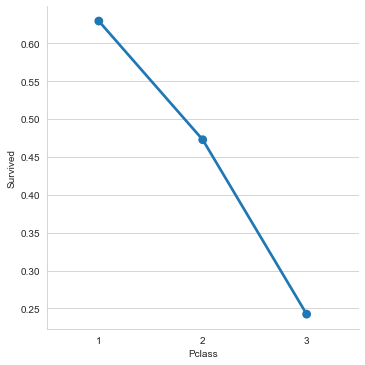

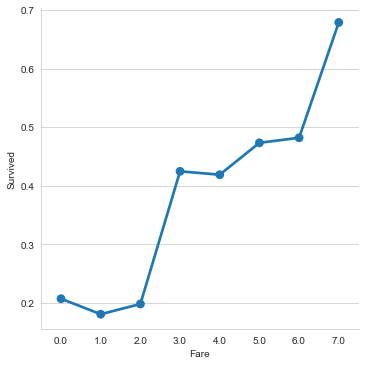

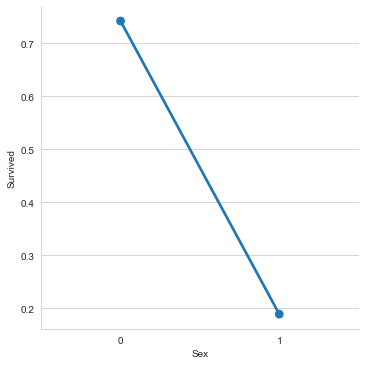

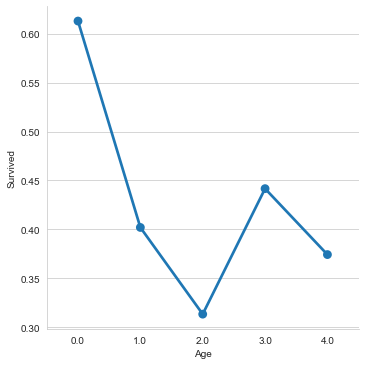

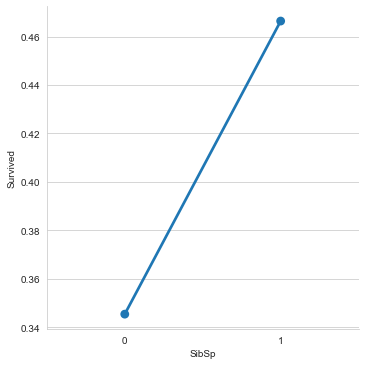

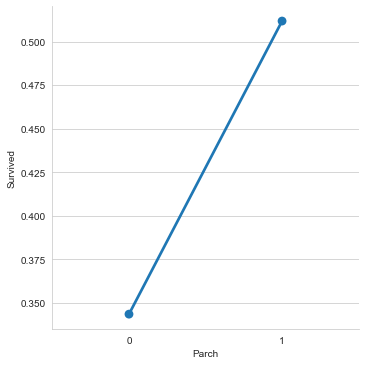

In [49]:
for feature in ['Pclass', 'Fare', 'Sex', 'Age', 'SibSp', 'Parch']:
    survival_rate(feature)

Fare / Pclass: The survival rate significantly increased when passenger belonged to the first class. Higher the Fare, greater the chances of survival. Therefore, the rich were more likely to survive the tragedy.

Sex: The survival rate for female passengers were significantly higher than the male passengers.

Age: Children (Age<=9) were more likely to survive than the elder. Age bin for passengers with the lowest survival rate was from 19 to 29, indicating that young people sacrificed themselves when the tragedy occurred.

SibSp / Parch: The graphs of these two features were very similar; passengers with family were more likely to survive than those who came alone.

## Train Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.20, 
                                                    random_state=101)

## Training and Predicting

In [51]:
clf = DecisionTreeClassifier(random_state=101)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [52]:
## Accuracy
print('Training data accuracy score:', clf.score(X_train, y_train))

Training data accuracy score: 0.8735955056179775


In [53]:
## Run 5 fold cross validation
cvs = cross_val_score(clf, df.drop('Survived', axis=1), df['Survived'], cv=5)
print(cvs)

[0.79329609 0.7752809  0.83146067 0.78651685 0.84269663]


In [54]:
## Show cross validation score mean
print("Accuracy: %0.4f" % (cvs.mean()))

Accuracy: 0.8059


Cross-validation accuracy is similar to training data accuracy

In [55]:
## Predict y given validation set
y_test_predicted = clf.predict(X_test)

In [56]:
#Accuracy
print('Test data accuracy score:', clf.score(X_test, y_test))

Test data accuracy score: 0.8324022346368715


Test data accuracy is similar to training data accuracy

## Classification report
We can check precision, recall, f1-score using classification report

In [57]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        99
           1       0.89      0.71      0.79        80

    accuracy                           0.83       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.83      0.83       179



## ROC Curve

In [58]:
## Get data to plot ROC Curve
fp, tp, th = roc_curve(y_test, y_test_predicted)
roc_auc = auc(fp, tp)
fp, tp, th, roc_auc

(array([0.        , 0.07070707, 1.        ]),
 array([0.    , 0.7125, 1.    ]),
 array([2, 1, 0], dtype=int64),
 0.8208964646464646)

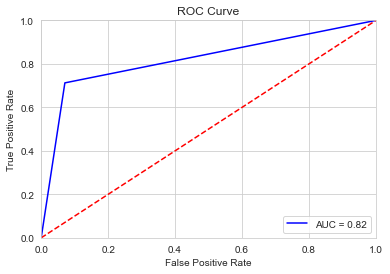

In [59]:
## Plot ROC Curve
plt.title('ROC Curve')
plt.plot(fp, tp, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()